In [38]:
import pandas as pd 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pickle

In [39]:
# Read csv file
df = pd.read_csv("/Users/tonix/Desktop/Python/SpotifyEDA/cleaned_dataset2.csv")
df.head()

,Unnamed: 0,playlist_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
0,0,pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,122.036
1,1,pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,99.972
2,2,pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,124.008
3,3,pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,121.956
4,4,pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,123.976


In [40]:
# Creating a list with labels
labels = df.pop('playlist_genre')

labels_str = []

for i in labels:
    
    if i == 0:
        labels_str.append('edm')
        
    elif i == 1:
        labels_str.append('latin')
    
    elif i == 2:
        labels_str.append('pop')
    
    elif i == 3:
        labels_str.append('r&b')
        
    elif i == 4:
        labels_str.append('rap')
        
    else:
        labels_str.append('rock')
        
labels_str = list(set(labels_str))
labels_str

['rock']

In [41]:
# Train and test split
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

In [42]:
# Validation split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [43]:
# Scaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_val = scaler.fit_transform(x_val)

In [44]:
# Model and parametrs
model = DecisionTreeClassifier()

param_grid = {'max_depth': [1, 2, 3, 4, 5],
          'criterion': ['gini', 'entropy'],
          'max_features': ['sqrt', 'log2'],
           'splitter': ['best', 'random']}

In [45]:
grid_model = GridSearchCV(model, param_grid=param_grid)

In [46]:
# Model fit
grid_model.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [47]:
grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [48]:
# Validation evaluate
best_estimator = grid_model.best_estimator_

val_predictions = best_estimator.predict(x_val)
val_accuracy = accuracy_score(y_val, val_predictions)
val_accuracy

0.7912066996574039

In [49]:
# Prediction
preds = grid_model.predict(x_test)

In [50]:
# Evaluate
report_tree = classification_report(preds, y_test)
print(report_tree)

              precision    recall  f1-score   support

         edm       0.75      0.93      0.83       980
       latin       0.94      0.65      0.77      1486
         pop       1.00      0.76      0.86      1418
         r&b       0.58      0.73      0.65       816
         rap       0.82      0.99      0.89       971
        rock       0.86      1.00      0.93       896

    accuracy                           0.82      6567
   macro avg       0.82      0.84      0.82      6567
weighted avg       0.85      0.82      0.82      6567



In [51]:
# As we can see we have really big entropu, so I'd like to use Random forest and visualize it

In [54]:
features = df.columns.tolist()

In [62]:
df['Unnamed: 0'].rename('track_artist')

Index(['Unnamed: 0', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo',
       'track_artist'],
      dtype='object')

In [63]:
df.head()

,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,track_artist
0,0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,122.036,0
1,1,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,99.972,1
2,2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,124.008,2
3,3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,121.956,3
4,4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,123.976,4


IndexError: list index out of range

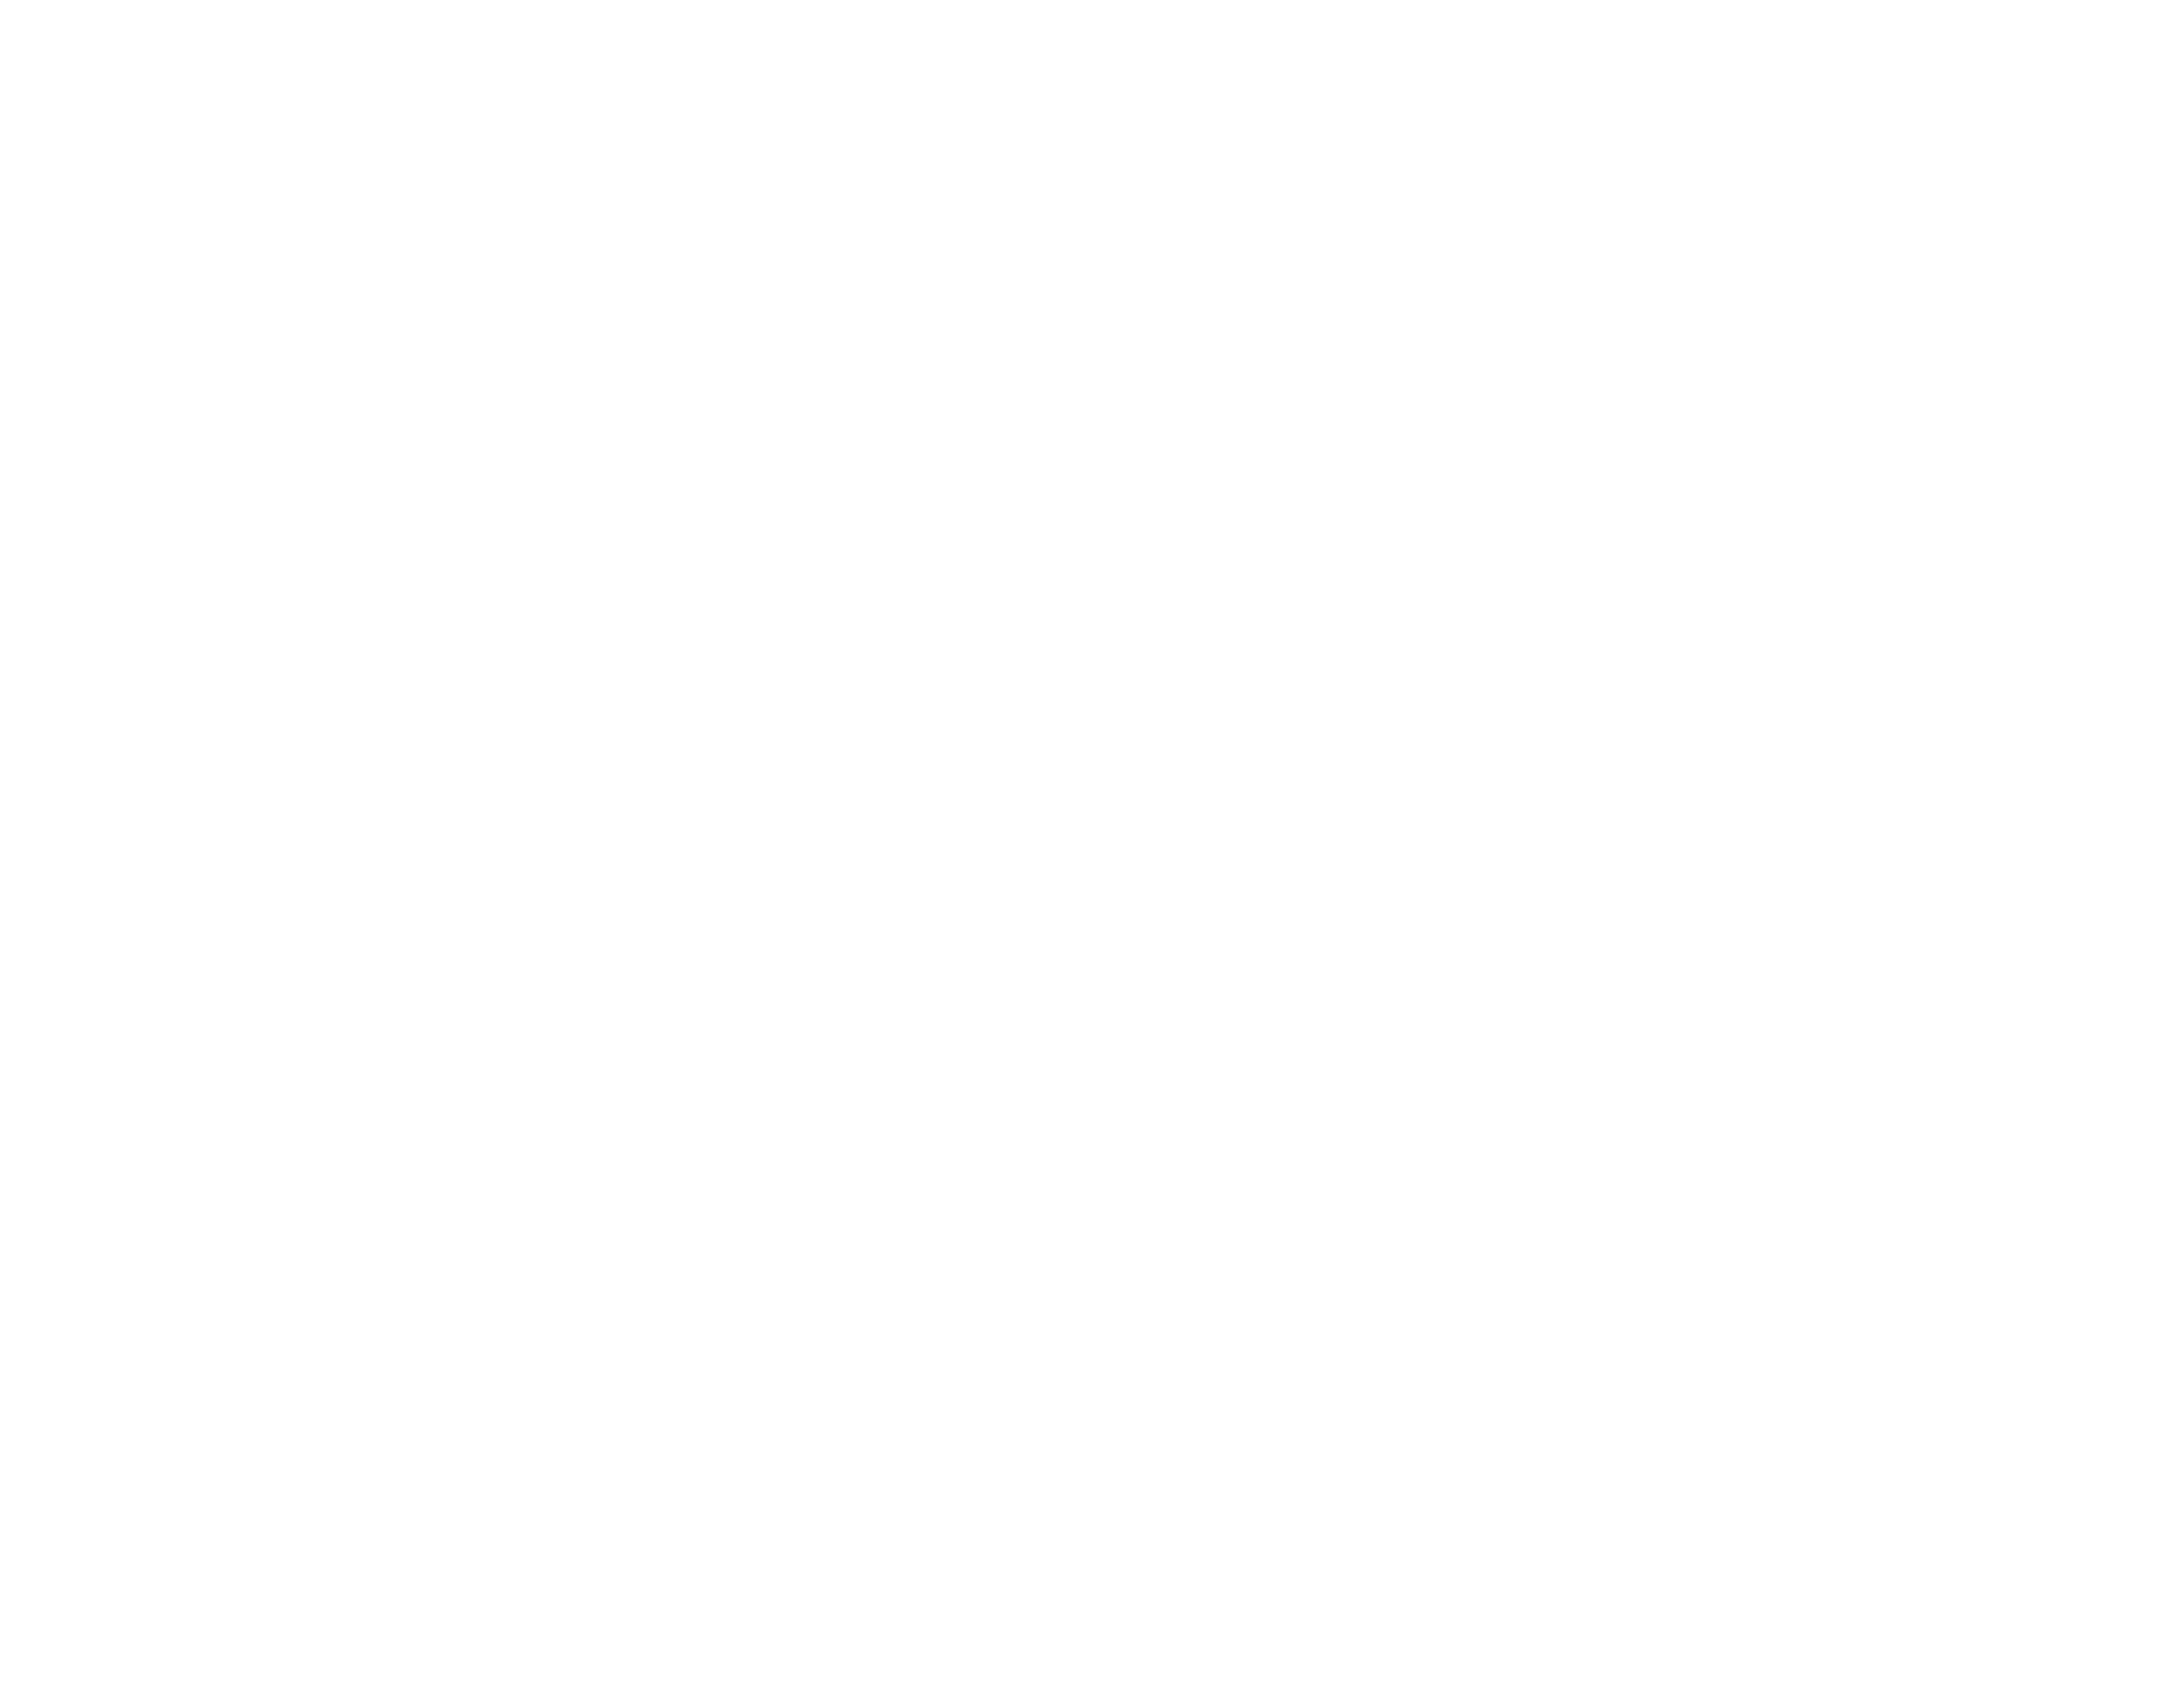

In [53]:
# Plot visualization
plt.figure(figsize=(95, 75))

plot_tree(best_estimator, feature_names=features, class_names=labels_str, filled=True)
plt.show()

In [36]:
with open('./Artifacts/decision tree.pkl', 'wb') as file:
    pickle.dump(grid_model, file)

# Conclusion

### Latin music is also good for dance and loud
### r&m music is bad in danceability
### Rap music is the lowest in instrumental and  less in danceability, but this genre have more speechiness
### Pop music usually is more louder, popular and the most speechiness